In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
train_file = open('../input/train.csv', 'r') 
test_file = open('../input/test.csv', 'r')
train_df = pd.read_csv(train_file, index_col='PassengerId')
test_df = pd.read_csv(test_file, index_col='PassengerId')
label = train_df.Survived
combine = train_df.drop('Survived', axis=1).append(test_df)

In [187]:
train_df.info()
print '----------------------------------'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), i

In [188]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [189]:
#Fare
FareMean = combine[['Pclass', 'Fare']].groupby('Pclass').mean().Fare
combine.ix[combine.Fare.isnull(), 'Fare'] = FareMean[combine.ix[combine.Fare.isnull(), 'Pclass'].values].values

In [190]:
#Embark
combine.Embarked = combine.Embarked.fillna('S')
#combine = combine.join(pd.get_dummies(combine.Embarked, prefix='Embarked'))

In [191]:
#Sex
combine = combine.join(pd.get_dummies(combine.Sex, prefix='Sex'))
combine['Child'] = combine.apply(lambda x : 1 if x.Age < 16 else 0, axis=1)

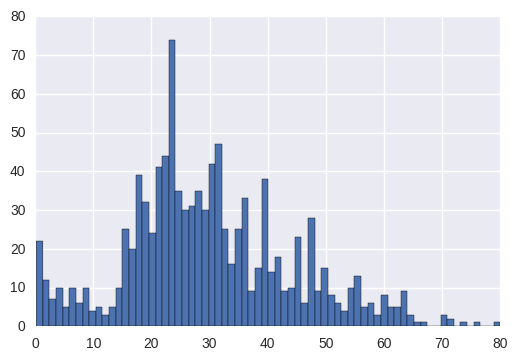

In [192]:
combine.Age.hist(bins=70)

/usr/local/Anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


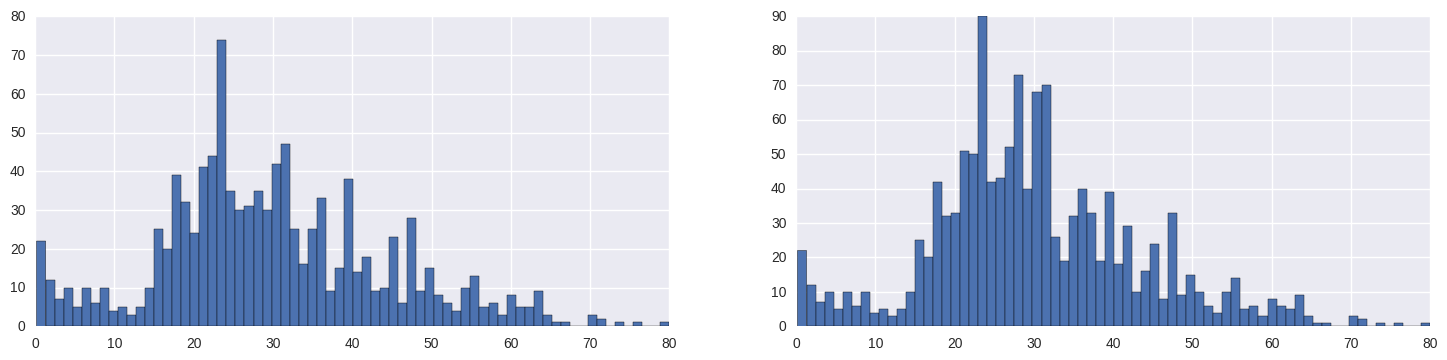

In [193]:
#Age
from sklearn.ensemble import RandomForestRegressor
train_age = combine[combine.Age.notnull()].drop(['Age', 'Cabin', 'Ticket', 'Name', 'Embarked', 'Sex'], axis=1)
age = combine[combine.Age.notnull()].Age
test_age = combine[combine.Age.isnull()].drop(['Age', 'Cabin', 'Ticket', 'Name', 'Embarked', 'Sex'], axis=1)
ageModel = RandomForestRegressor(n_estimators=1000)
ageModel.fit(train_age, age)
predictAge = ageModel.predict(test_age)
(f, ax) = plt.subplots(1, 2, figsize=(18, 4))

combine.Age.hist(bins=70, ax=ax[0])
combine['Age'][combine.Age.isnull()] = predictAge
combine.Age.hist(bins=70, ax=ax[1])

In [194]:
#name
def replace_titles(x):
    title = x.Name.split(',')[1].split('.')[0]
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
title = combine.apply(replace_titles, axis=1)
combine = combine.join(pd.get_dummies(title, prefix='Title'))

In [195]:
#Cabin
combine = combine.join(pd.get_dummies(combine.Cabin.fillna('U').map(lambda c : c[0]), prefix='Cabin'))

In [196]:
#Ticket
def tkt(t):
    arr =  t.replace('.', '').replace('/', '').split(' ')
    return arr[0] if len(arr) > 1 else 'NUM'
combine = combine.join(pd.get_dummies(combine.Ticket.map(tkt), prefix='Ticket'))

In [197]:
combine['FamilySize'] = combine.Parch + combine.SibSp 
#sns.countplot(x='Survived', hue='Title', data=train_df)

combine.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [198]:
#Drop
combine.drop(['Sex','Name', 'Embarked', 'Ticket', 'Cabin'], axis=1, inplace=1)

In [199]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 70 columns):
Pclass                 1309 non-null int64
Age                    1309 non-null float64
Fare                   1309 non-null float64
Sex_female             1309 non-null float64
Sex_male               1309 non-null float64
Child                  1309 non-null int64
Title_ Capt            1309 non-null float64
Title_ Col             1309 non-null float64
Title_ Don             1309 non-null float64
Title_ Dona            1309 non-null float64
Title_ Dr              1309 non-null float64
Title_ Jonkheer        1309 non-null float64
Title_ Lady            1309 non-null float64
Title_ Major           1309 non-null float64
Title_ Master          1309 non-null float64
Title_ Miss            1309 non-null float64
Title_ Mlle            1309 non-null float64
Title_ Mme             1309 non-null float64
Title_ Mr              1309 non-null float64
Title_ Mrs             1309 non-null float

In [202]:
from sklearn.preprocessing import StandardScaler
feats = combine.columns
combine = StandardScaler().fit_transform(combine)

In [203]:
train_x = combine[:891]
train_y = label

test_x = combine[891:]

In [204]:
train_x.shape

(891, 70)

In [205]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model = RandomForestClassifier(n_estimators=1000)
model = model.fit(train_x, train_y)

In [208]:
pd.DataFrame(zip(feats, model.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
1,Age,0.218074
2,Fare,0.195244
18,Title_ Mr,0.095959
3,Sex_female,0.078397
4,Sex_male,0.075455
69,FamilySize,0.074069
0,Pclass,0.058025
32,Cabin_U,0.029851
19,Title_ Mrs,0.024408
15,Title_ Miss,0.024321


In [209]:
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(model, prefit=True, threshold=0.01)
train_new = m.transform(train_x)
train_new.shape

(891, 12)

In [210]:
test_new = m.transform(test_x)
test_new.shape

(418, 12)

In [211]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [212]:
gbdt = GradientBoostingClassifier(max_features='sqrt')

parameter_grid = {
                     'max_depth' : [4, 5,10, 15, 20],
                     'n_estimators': [2000, 3000, 5000, 8000],
                     'learning_rate' : [0.001, 0.01, 0.05]
                 }

gbdt_search = RandomizedSearchCV(gbdt, param_distributions=parameter_grid, n_jobs=7, cv=5)

gbdt_search.fit(train_new, train_y)

print('Best score: {}'.format(gbdt_search.best_score_))
print('Best parameters: {}'.format(gbdt_search.best_params_))

Best score: 0.830527497194
Best parameters: {'n_estimators': 5000, 'learning_rate': 0.001, 'max_depth': 4}


In [215]:
rf = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,10,15, 20],
                 'n_estimators': [2000, 5000, 8000],
                 'criterion' : ['gini', 'entropy']
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

rf_search = RandomizedSearchCV(rf, param_distributions=parameter_grid, n_jobs=7, cv=cross_validation)

rf_search.fit(train_new, train_y)

print('Best score: {}'.format(rf_search.best_score_))
print('Best parameters: {}'.format(rf_search.best_params_))

Best score: 0.832772166105
Best parameters: {'n_estimators': 8000, 'criterion': 'entropy', 'max_depth': 10}


(418, 12)

In [225]:
model = RandomForestClassifier(max_features='sqrt', n_estimators=8000, criterion='entropy', max_depth=10)
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
val_trainx, val_testx, val_trainy, val_testy = train_test_split(train_new, train_y, test_size=0.2) 
cross_val_score(model, val_testx, val_testy)

array([ 0.6557377 ,  0.84745763,  0.84745763])

In [ ]:
from sklearn.svm import SVC

svc= SVC()

parameter_grid = {
                 'kernel' : ['rbf', 'linear']
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

svc_search = GridSearchCV(svc, param_grid=parameter_grid, n_jobs=7, cv=cross_validation)

svc_search.fit(train_new, train_y)

print('Best score: {}'.format(svc_search.best_score_))
print('Best parameters: {}'.format(svc_search.best_params_))

KeyboardInterrupt: 

In [ ]:
predict = np.array([rf_search.predict(test_new), gbdt_search.predict(test_new), svc_search.predict(test_new)])

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
output = predict.mean(axis=0).astype(int)

In [ ]:
output.shape

In [216]:
import csv
openfile = open('result.csv', 'wb')
csv_wt = csv.writer(openfile)
csv_wt.writerow(["PassengerId","Survived"])
csv_wt.writerows(zip(test_df.index.values, rf_search.predict(test_new)))
openfile.close()